Análisis estadístico sobre una base de datos de cámaras de video.
Link al video explicativo -> https://youtu.be/KJwwKj0rvnE

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

### EDA y limpieza de datos

In [2]:
df = pd.read_csv("camera_dataset.csv")
df_raw = df.copy()
df.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 13 columns):
Model                      1038 non-null object
Release date               1038 non-null int64
Max resolution             1038 non-null float64
Low resolution             1038 non-null float64
Effective pixels           1038 non-null float64
Zoom wide (W)              1038 non-null float64
Zoom tele (T)              1038 non-null float64
Normal focus range         1038 non-null float64
Macro focus range          1037 non-null float64
Storage included           1036 non-null float64
Weight (inc. batteries)    1036 non-null float64
Dimensions                 1036 non-null float64
Price                      1038 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 105.5+ KB


In [ ]:
#Tiene ya muy pocos NA's.

Model:  Modelo de la cámara 
Max resolution: Resolución máxima (en una cámara FULLHD vendría siendo 1920 pixeles, por ej.)
Low resolution: Resolución mínima (en una cámara FULLHD vendría siendo 1080 pixeles)
Effective pixels: Difícil de definir, pero es básicamente los Megapixeles de la cámara. Quien hizo el DF los redondeó hacia abajo y por eso existen valores con cero.
Zoom wide (W): Zoom amplio en mm
Zoom tele (T): Zoom teleobjetivo en mm (si ambos son iguales = lente fijo)
Storage included: Me parece que son GB de almacenamiento interno.
Weight (inc. batteries): Peso en gramos

In [4]:
df.describe()

,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
count,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1037.000000,1036.000000,1036.000000,1036.000000,1038.000000
mean,2003.590559,2474.672447,1773.936416,4.596339,32.963391,121.525048,44.145472,7.787850,17.447876,319.265444,105.363417,457.384393
std,2.724755,759.513608,830.897955,2.844044,10.333149,93.455422,24.141959,8.100081,27.440655,260.410137,24.262761,760.452918
min,1994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
25%,2002.000000,2048.000000,1120.000000,3.000000,35.000000,96.000000,30.000000,3.000000,8.000000,180.000000,92.000000,149.000000
50%,2004.000000,2560.000000,2048.000000,4.000000,36.000000,108.000000,50.000000,6.000000,16.000000,226.000000,101.000000,199.000000
75%,2006.000000,3072.000000,2560.000000,7.000000,38.000000,117.000000,60.000000,10.000000,20.000000,350.000000,115.000000,399.000000
max,2007.000000,5616.000000,4992.000000,21.000000,52.000000,518.000000,120.000000,85.000000,450.000000,1860.000000,240.000000,7999.000000


In [18]:
df[df["Weight (inc. batteries)"] == 0] #they're weightless lol

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
6,Agfa ePhoto CL50,1999,1280.0,640.0,1.0,34.0,102.0,0.0,0.0,8.0,0.0,0.0,179.0
185,Contax N Digital,2000,3040.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,152.0,549.0
188,Epson PhotoPC 850 Zoom,1999,1600.0,640.0,1.0,35.0,105.0,0.0,0.0,0.0,0.0,0.0,229.0
196,Epson PhotoPC 700,1998,1280.0,640.0,1.0,35.0,35.0,50.0,10.0,4.0,0.0,0.0,229.0
197,Epson PhotoPC 750 Zoom,1998,1280.0,640.0,1.0,34.0,102.0,80.0,20.0,8.0,0.0,0.0,229.0
295,Fujifilm MX-600 Zoom,1999,1280.0,640.0,1.0,38.0,115.0,90.0,25.0,4.0,0.0,122.0,179.0
624,Olympus D-600L,1997,1280.0,640.0,1.0,36.0,110.0,60.0,30.0,4.0,0.0,115.0,1699.0
811,Pentax Optio Z10,2007,3264.0,2592.0,8.0,38.0,266.0,40.0,8.0,0.0,0.0,94.0,249.0


In [3]:
df = df.rename(columns={"Weight (inc. batteries)":"Weight"}) 

In [4]:
media_peso = round(np.mean(df['Weight']))
media_peso

319

In [5]:
df['Weight'] = np.where((df['Weight'] == 0),media_peso,df['Weight']) #modifico los pesos con valor de 0 por la media
df.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight,Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,319.0,0.0,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,319.0,0.0,269.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0


In [9]:
df.isnull().sum()

Model                 0
Release date          0
Max resolution        0
Low resolution        0
Effective pixels      0
Zoom wide (W)         0
Zoom tele (T)         0
Normal focus range    0
Macro focus range     1
Storage included      2
Weight                2
Dimensions            2
Price                 0
Weight(lbs)           2
dtype: int64

In [6]:
df.dropna(axis=0 , how="any", inplace=True)

In [11]:
df.isnull().sum()

Model                 0
Release date          0
Max resolution        0
Low resolution        0
Effective pixels      0
Zoom wide (W)         0
Zoom tele (T)         0
Normal focus range    0
Macro focus range     0
Storage included      0
Weight                0
Dimensions            0
Price                 0
Weight(lbs)           0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1036 entries, 0 to 1037
Data columns (total 14 columns):
Model                 1036 non-null object
Release date          1036 non-null int64
Max resolution        1036 non-null float64
Low resolution        1036 non-null float64
Effective pixels      1036 non-null float64
Zoom wide (W)         1036 non-null float64
Zoom tele (T)         1036 non-null float64
Normal focus range    1036 non-null float64
Macro focus range     1036 non-null float64
Storage included      1036 non-null float64
Weight                1036 non-null float64
Dimensions            1036 non-null float64
Price                 1036 non-null float64
Weight(lbs)           1036 non-null float64
dtypes: float64(12), int64(1), object(1)
memory usage: 121.4+ KB


### Análisis multivariable

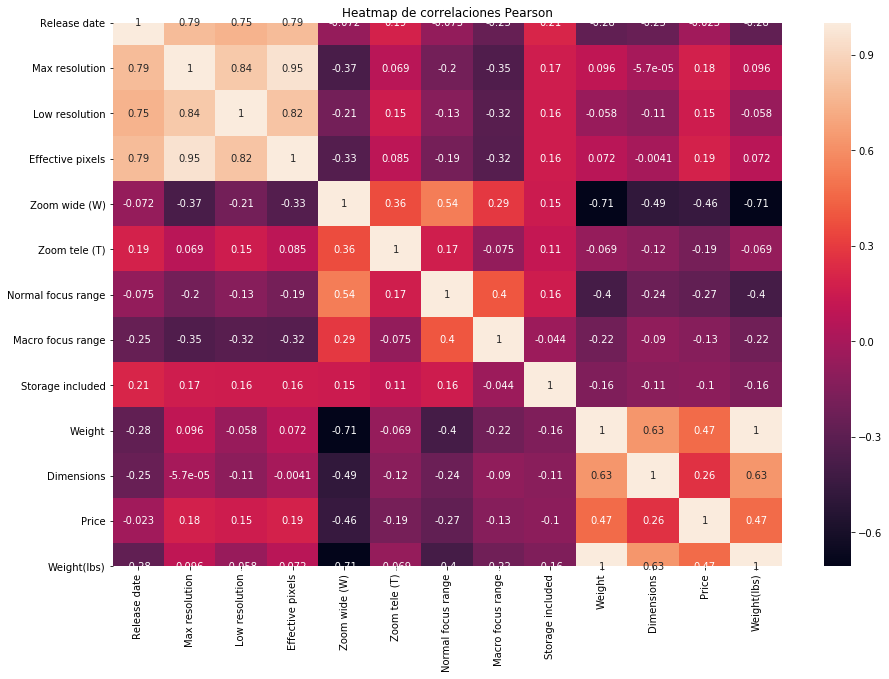

In [13]:
df_corr=df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_corr, annot=True, ax=ax)
plt.title('Heatmap de correlaciones Pearson')
plt.show()

In [ ]:
#Hay algunas incongruencias con Pearson (Weight and Zoom Wide = -0.71??). Veamos Spearman.

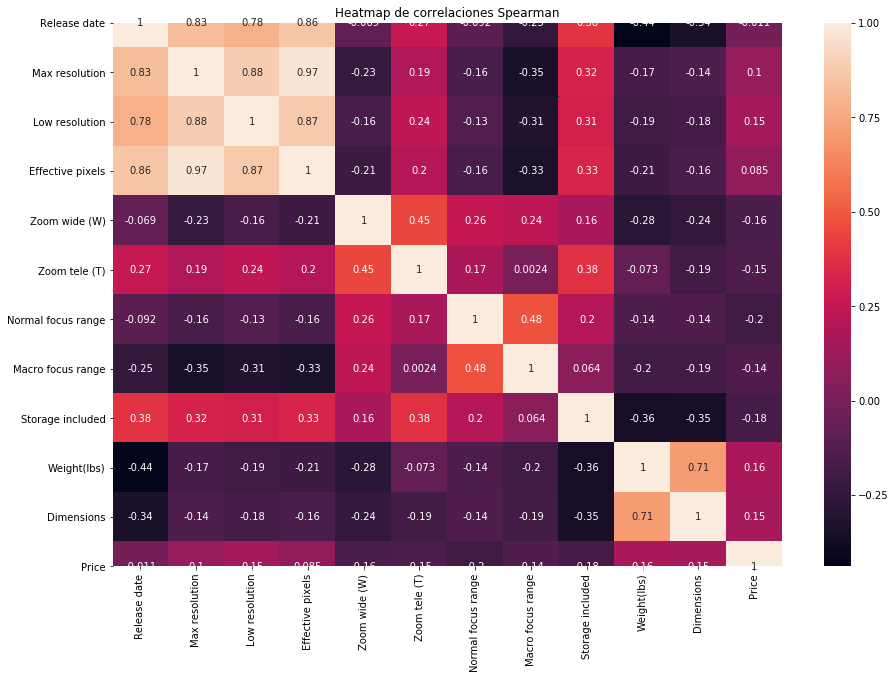

In [33]:
df_corr=df.corr(method='spearman')
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_corr, annot=True, ax=ax)
plt.title('Heatmap de correlaciones Spearman')
plt.show()

In [ ]:
#Parece haber una muy ligera correlación negativa entre el peso y la fecha de lanzamiento (-0.44).
#También existe una correlación positiva con la fecha y la resolución de las cámaras (.78 y .83). Más resolución con el tiempo.
#Effective pixel y Max. resolution es casi casi 1. Esto es porque casi vienen siendo lo mismo.
#Hay una correlación positiva entre las dimensiones y el peso.
#Y como tanto Pearson y Spearman tienen una correlación alta con esas variables, eso nos indica que existe 
#una correlación positiva lineal.

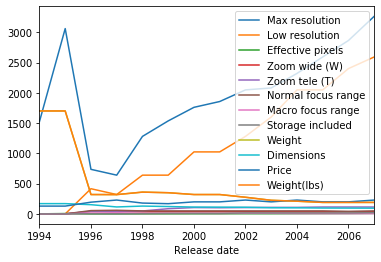

In [134]:
df.groupby('Release date').median().plot.line()

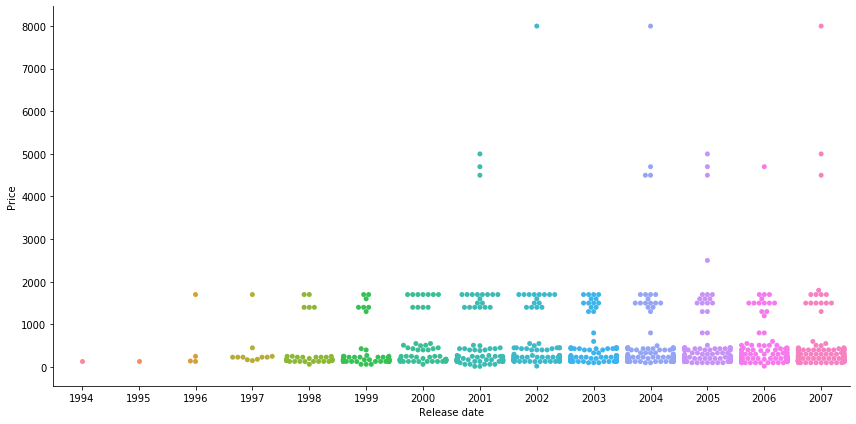

In [33]:
g = sns.catplot(x="Release date", y="Price", data=df,height=6, kind="swarm", aspect=2)

In [34]:
#Esta gráfica nos muestra algo interesante. Los precios de las cámaras no se hacen necesariamente más caras
#conforme pasa el tiempo.
#También podemos ver como 4 tipos de gamas: baja, media, alta y especializados.

### Análisis univariado

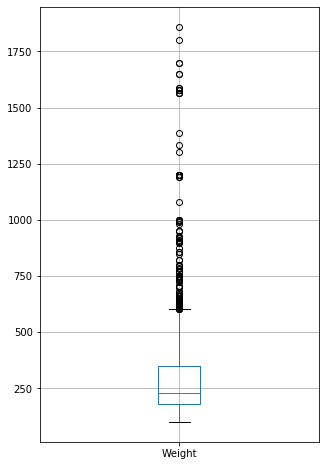

In [7]:
plt.figure(figsize=(5,8))
df.boxplot(column=["Weight"])

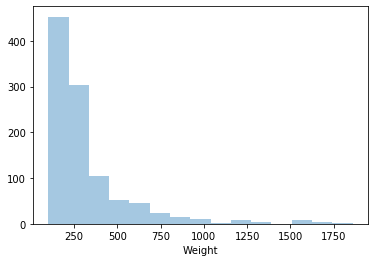

In [47]:
sns.distplot(df["Weight"], bins=15, kde=False, rug=False)
plt.show()

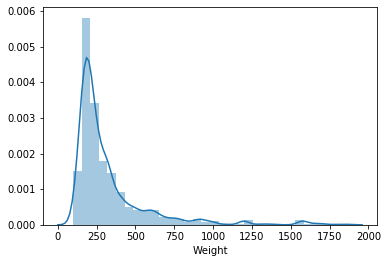

In [44]:
sns.distplot(df["Weight"], bins=int(np.sqrt(len(df.Weight))), kde=True, rug=False)
plt.show()

In [10]:
df["Weight"].skew() #Sesgo pronunciado a la derecha

2.9274780795620243

In [11]:
df["Weight"].kurtosis() #Curva muy picuda (leptocúrtica>0)

10.311096362863655

In [32]:
np.mean(df.Weight)

325.7316602316602

In [39]:
np.std(df.Weight)

256.20307349123567

In [26]:
precio_sin_outliers = df[df.Price<500]["Price"]

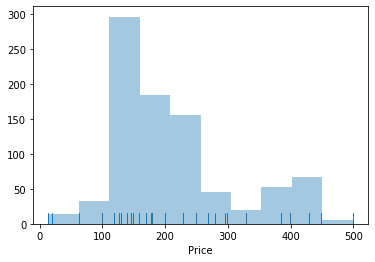

In [50]:
sns.distplot(precio_sin_outliers, bins=10, kde=False, rug=True)
plt.show()

In [31]:
precio_sin_outliers.skew()

1.0837720602012286

In [48]:
precio_sin_outliers.kurtosis()

0.2374798991623175

### Análisis Bivariado
Veamos más a detalle algunas de las correlaciones vistas en el heatmap

<Figure size 1080x1080 with 0 Axes>

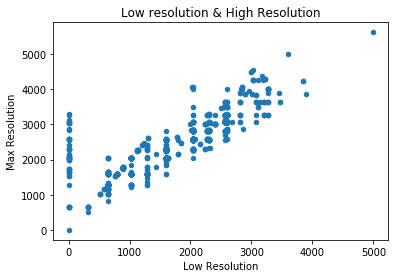

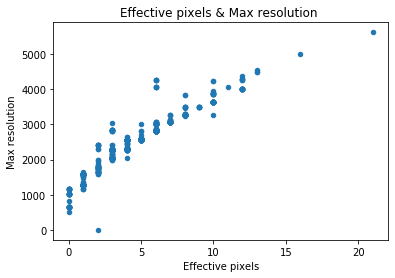

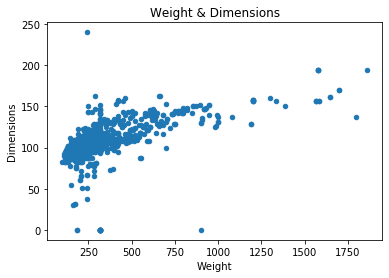

In [42]:
fig= plt.figure(figsize=(15,15))
# ax2=fig.add_subplot(331)
df.plot.scatter(x="Low resolution", y='Max resolution')
plt.title('Low resolution & High Resolution')
plt.xlabel('Low Resolution')
plt.ylabel('Max Resolution')
# ax2=fig.add_subplot(332)
df.plot.scatter(x="Effective pixels", y='Max resolution')
plt.title('Effective pixels & Max resolution ')
plt.xlabel('Effective pixels')
plt.ylabel('Max resolution')
# ax2=fig.add_subplot(333)
df.plot.scatter(x="Weight", y='Dimensions')
plt.title('Weight & Dimensions')
plt.xlabel('Weight')
plt.ylabel('Dimensions')
plt.show()

In [44]:
rho, p = st.spearmanr(df["Low resolution"],df["Max resolution"])
print('El coeficiente de correlación de spearman es de: {}'.format(rho))
print('El valor p es de: {}'.format(p))

El coeficiente de correlación de spearman es de: 0.8820736679859681
El valor p es de: 0.0


In [45]:
#Como el valor es de correlación de spearman es casi 1 y la probabilidad es menor a 0.05, este valor es significante

In [46]:
rho, p = st.spearmanr(df["Effective pixels"],df["Max resolution"])
print('El coeficiente de correlación de spearman es de: {}'.format(rho))
print('El valor p es de: {}'.format(p))

El coeficiente de correlación de spearman es de: 0.9746948794038002
El valor p es de: 0.0


In [47]:
#Como el valor es de correlación de spearman es casi 1 y la probabilidad es menor a 0.05, este valor es significante

In [48]:
rho, p = st.spearmanr(df["Weight"],df["Dimensions"])
print('El coeficiente de correlación de spearman es de: {}'.format(rho))
print('El valor p es de: {}'.format(p))

El coeficiente de correlación de spearman es de: 0.7108578697588175
El valor p es de: 3.225276319510633e-160


In [ ]:
#Como el valor es de correlación de spearman está más cercano a 1 y la probabilidad es menor a 0.05, este valor es significante.

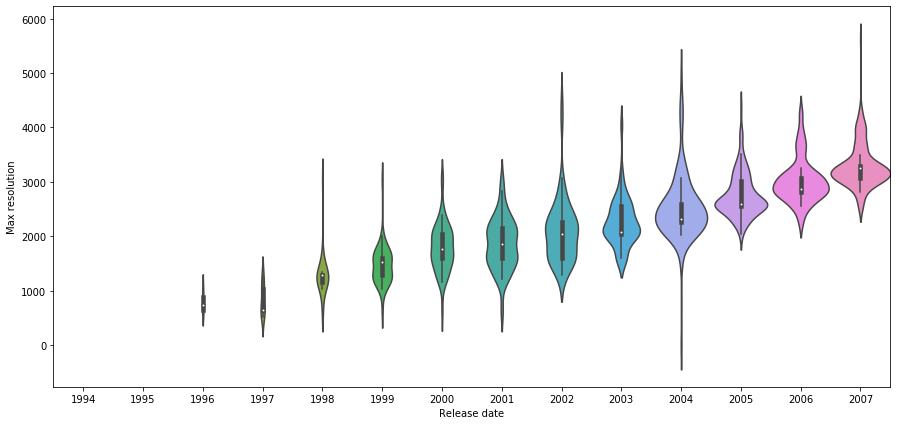

In [115]:
plt.figure(figsize=(15,7))
sns.violinplot(x="Release date",y="Max resolution",data=df,width =1,scale="count")

In [ ]:
#Incremento en las resolucione de las cámaras conforme avanza el tiempo.

In [52]:
#Aspect ratio más popular.
Aspect_ratio = np.where((df['Low resolution'] > 0),df["Max resolution"]/df["Low resolution"],0) 

Aspect_ratio[Aspect_ratio>0]

array([1.6       , 2.        , 1.8       , 1.8       , 2.5       ,
       2.        , 1.3       , 1.25      , 1.25      , 1.5625    ,
       1.5625    , 1.25      , 1.28      , 1.28      , 1.5625    ,
       1.28      , 1.28      , 1.42      , 1.42      , 1.265625  ,
       1.265625  , 2.        , 2.        , 1.28      , 1.42      ,
       1.265625  , 1.23943662, 1.18518519, 1.18518519, 1.18518519,
       2.        , 1.5625    , 1.        , 1.        , 1.25925926,
       1.29545455, 1.2254902 , 1.28      , 1.23943662, 1.18518519,
       1.25925926, 1.28      , 1.42      , 1.42      , 1.265625  ,
       1.5       , 2.        , 1.12886598, 1.125     , 1.12886598,
       2.        , 1.38666667, 1.125     , 1.37735849, 1.37735849,
       1.5       , 1.37735849, 1.38461538, 1.38068182, 1.38068182,
       1.37878788, 1.5       , 1.5       , 2.        , 1.42      ,
       1.42      , 1.62      , 1.18518519, 1.29545455, 1.2254902 ,
       1.43661972, 2.        , 1.8125    , 1.25      , 2.5    

In [53]:
Aspect_ratio = pd.Series(Aspect_ratio[Aspect_ratio>0]) #Selecciona solo los valores no negativos

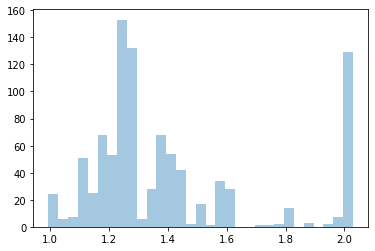

In [58]:
sns.distplot(Aspect_ratio[Aspect_ratio<2.1], bins=int(np.sqrt(len(Aspect_ratio))), kde=False, rug=False)
plt.show()

Nos muestra la distribución del aspect ratio; 1.0 = imagen cuadrada. 2.0 = una imagen rectangular (casi como un video en YouTube). Lo más comun de 1997 a 2007 eran las imagenes que eran más cuadradas que rectangulares.